[[ 5.28834308 -2.82197315]
 [-1.43483683 -9.714519  ]
 [ 7.49984751 -4.27970676]
 ...
 [ 7.06951612 -4.86772659]
 [ 4.14209563 -4.21504341]
 [-2.40871673 -8.0964202 ]] [1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 

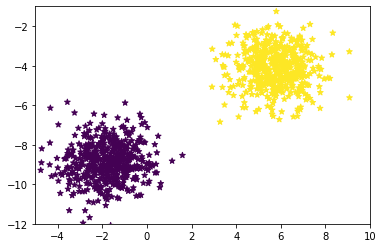

In [1]:
#importing required modules

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

import numpy as np



#generate classification dataset (centers : gives no of classified output labels)
#X is input datapoints consist i=of 2 features and y is output label

X,y = make_blobs(n_samples=1000,n_features=2,centers=2,random_state=40)

print(X,y)

X.shape

#plot scatterplot for datapoints (X)
plt.scatter(X[:,0],X[:,1],marker='*',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [6]:
#No of +ve and -ve points in dataset:

print("No of positive points",np.count_nonzero(y))
print("No of negative points",np.count_nonzero(y==0))

No of positive points 500
No of negative points 500


In [0]:
#split train and test data


from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 40)



In [8]:
#shape of train and test data

print("Shape of training dataset:",X_train.shape)
print("Shape of test dataset:",X_test.shape)

Shape of training dataset: (700, 2)
Shape of test dataset: (300, 2)


In [13]:
from collections import Counter

import operator

from sklearn.neighbors import KNeighborsClassifier

import scipy


class KNN:
    def __init__(self, k):
        self.k = k
        

    #fit () to train the K-nn model 
    #since k-nn is lazy learner it only stores training set in memory

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

        print("Training is done for K-NN")
        

    #calculating euclidean distance(shortest dist) between test set and train set

    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    

    #predict method to determine the class labels for test set

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            majority_vote = Counter(votes).most_common(1)[0][0]
            final_output.append(majority_vote)
            
        return final_output

    #calulating accuracy of the model
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)


#object creation
#Nearest neighbor is 3 here 

classifier = KNN(3)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print("Model prediction is:")
print(prediction)

model_accuracy = classifier.score(X_test, y_test)

print("Accuracy of K-nn classifier is:",model_accuracy)

Training is done for K-NN
Model prediction is:
[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
Accuracy of K-nn classifier is: 1.0
